# Telecom Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Step 1: Reading and Understanding the data

In [1]:
# First import the Pandas,NumPy and the required packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.expand_frame_repr', False)

In [3]:
telecom_churn_df = pd.read_csv('telecom_churn_data.csv')
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_churn_df.shape

(99999, 226)

####  Removing columns with low variance 

In [5]:
telecom_churn_df.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)

#### Imputing 0 values in Recharge Column. 

In [6]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_churn_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [7]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'
       ]

In [8]:
# impute missing values with 0
telecom_churn_df[zero_impute] = telecom_churn_df[zero_impute].apply(lambda x: x.fillna(0))

#### Imputing -1 values in Categorical Columns night_pck_user and fb_user 

In [9]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [10]:
# impute missing values with -1
telecom_churn_df[cat_cols] = telecom_churn_df[cat_cols].apply(lambda x: x.fillna(-1))

In [11]:
telecom_churn_df.shape

(99999, 221)

##### Removing Columns with more than 70% null value.

In [12]:
df = telecom_churn_df.isnull().sum()*100/telecom_churn_df.shape[0] >70

In [13]:
df[df]

date_of_last_rech_data_6    True
date_of_last_rech_data_7    True
date_of_last_rech_data_8    True
date_of_last_rech_data_9    True
count_rech_2g_6             True
count_rech_2g_7             True
count_rech_2g_8             True
count_rech_2g_9             True
count_rech_3g_6             True
count_rech_3g_7             True
count_rech_3g_8             True
count_rech_3g_9             True
arpu_3g_6                   True
arpu_3g_7                   True
arpu_3g_8                   True
arpu_3g_9                   True
arpu_2g_6                   True
arpu_2g_7                   True
arpu_2g_8                   True
arpu_2g_9                   True
dtype: bool

In [14]:
## Remove columns with more than 70% NA


cols = telecom_churn_df.columns[(telecom_churn_df.isnull().sum()/telecom_churn_df.shape[0])>0.7]
telecom_churn_df.drop(cols, axis=1,inplace=True)
telecom_churn_df.shape

(99999, 201)

In [15]:
# Checking NaN columns more than 10 %
df_per = telecom_churn_df.isnull().sum()*100/telecom_churn_df.shape[0] > 10
df_per[df_per]

Series([], dtype: bool)

#### imputing 0 value for all the other numeric columns

In [16]:
num_cols = telecom_churn_df.select_dtypes(include=np.number).columns.tolist()

In [17]:
#imputing with 0 value for NaN columns after getting high value end customers. 

telecom_churn_df[num_cols] = telecom_churn_df[num_cols].apply(lambda x: x.fillna(0) if x.dtype!='object' else x, axis=0) 

In [18]:
telecom_churn_df[num_cols].describe(include='all')

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,127.183397,128.512397,...,0.084581,-0.518465,-0.511905,-0.501975,-0.517595,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,292.433718,303.869995,...,0.650457,0.842420,0.845358,0.848097,0.834303,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,5.430000,4.880000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,30.980000,29.230000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,112.610000,108.880000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [19]:
telecom_churn_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,...,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,0,-1.0,1.0,1.0,-1.0,1006,0.0,0.0,0.00,0.00
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,0,-1.0,-1.0,-1.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,0,-1.0,-1.0,-1.0,-1.0,2491,0.0,0.0,0.00,0.00
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,0,0.0,-1.0,-1.0,-1.0,1526,0.0,0.0,0.00,0.00


In [20]:
df2 = telecom_churn_df.isnull().sum()*100/telecom_churn_df.shape[0] > 0
df2[df2]

date_of_last_rech_6    True
date_of_last_rech_7    True
date_of_last_rech_8    True
date_of_last_rech_9    True
dtype: bool

#### Removing the date columns which have null value in the data

In [21]:
telecom_churn_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis=1,inplace=True)

In [22]:
df2 = telecom_churn_df.isnull().sum()*100/telecom_churn_df.shape[0] > 0
df2[df2]

Series([], dtype: bool)

## Step 2: High Value Customer
### Deriving new column


In [23]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_churn_df['total_data_rech_6'] = telecom_churn_df.total_rech_data_6 * telecom_churn_df.av_rech_amt_data_6
telecom_churn_df['total_data_rech_7'] = telecom_churn_df.total_rech_data_7 * telecom_churn_df.av_rech_amt_data_7


In [24]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_churn_df['amt_data_6'] = telecom_churn_df.total_rech_amt_6 + telecom_churn_df.total_data_rech_6
telecom_churn_df['amt_data_7'] = telecom_churn_df.total_rech_amt_7 + telecom_churn_df.total_data_rech_7

In [25]:
# calculate average recharge done by customer in June and July
telecom_churn_df['av_amt_data_6_7'] = (telecom_churn_df.amt_data_6 + telecom_churn_df.amt_data_7)/2

In [26]:
# Calculate 70% percentile amount 
amt = telecom_churn_df['av_amt_data_6_7'].quantile(0.70)
amt 

478.0

In [27]:
#Dropping rows which are less than 70 percentile
telecom_churn_filtered = telecom_churn_df[telecom_churn_df.av_amt_data_6_7 >=478]
telecom_churn_filtered.shape

(30001, 202)

In [28]:
# delete columns created to filter high-value customers
telecom_churn_filtered = telecom_churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_churn_filtered.shape

(30001, 197)

In [29]:
telecom_churn_df.shape

(99999, 202)

## Step 3: Derive Churn
### 9th Month is churn phase - Usage based churn. 

In [30]:
# calculate total incoming and outgoing minutes of usage
telecom_churn_filtered['total_calls_mou_9'] = telecom_churn_filtered.total_ic_mou_9 + telecom_churn_filtered.total_og_mou_9

In [31]:
# calculate 2g and 3g data consumption
telecom_churn_filtered['total_data_cons_9'] =  telecom_churn_filtered.vol_2g_mb_9 + telecom_churn_filtered.vol_3g_mb_9

In [32]:
# create churn column: those who have not used either calls or 2G or 3G data in the month of September 
# 0 - not churn, 1 - churn
telecom_churn_filtered['churn'] = telecom_churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_data_cons_9 == 0) else 0, axis=1)

In [33]:
#Check Churn Percentage
print(telecom_churn_filtered.churn.value_counts()*100/telecom_churn_filtered.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


In [34]:
telecom_churn_filtered.shape

(30001, 200)

## Step 4: Discarding 9th month data 

In [35]:
import re

In [36]:
#Dropping 9th month data on the main churn df
telecom_churn_df= telecom_churn_df.select(lambda x: not re.search('_9', x), axis=1)


In [37]:
telecom_churn_df.shape

(99999, 155)

In [38]:
#Dropping 9th month data on the filtered churn df
telecom_churn_filtered= telecom_churn_filtered.select(lambda x: not re.search('_9', x), axis=1)
telecom_churn_filtered.shape

(30001, 151)

## Step 5: Derive New Variables

#### Calculate difference between action phase (8th Month) and good phase (6th and 7th Month)


Deriving new variables. One such important feature, in this situation, will be the difference between the 8th month and the previous months. The difference can be in terms of usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [39]:
telecom_churn_filtered['arpu_diff'] = telecom_churn_filtered.arpu_8 - ((telecom_churn_filtered.arpu_6 + telecom_churn_filtered.arpu_7)/2)

telecom_churn_filtered['onnet_mou_diff'] = telecom_churn_filtered.onnet_mou_8 - ((telecom_churn_filtered.onnet_mou_6 + telecom_churn_filtered.onnet_mou_7)/2)

telecom_churn_filtered['offnet_mou_diff'] = telecom_churn_filtered.offnet_mou_8 - ((telecom_churn_filtered.offnet_mou_6 + telecom_churn_filtered.offnet_mou_7)/2)

telecom_churn_filtered['roam_ic_mou_diff'] = telecom_churn_filtered.roam_ic_mou_8 - ((telecom_churn_filtered.roam_ic_mou_6 + telecom_churn_filtered.roam_ic_mou_7)/2)

telecom_churn_filtered['roam_og_mou_diff'] = telecom_churn_filtered.roam_og_mou_8 - ((telecom_churn_filtered.roam_og_mou_6 + telecom_churn_filtered.roam_og_mou_7)/2)

telecom_churn_filtered['loc_og_mou_diff'] = telecom_churn_filtered.loc_og_mou_8 - ((telecom_churn_filtered.loc_og_mou_6 + telecom_churn_filtered.loc_og_mou_7)/2)

telecom_churn_filtered['std_og_mou_diff'] = telecom_churn_filtered.std_og_mou_8 - ((telecom_churn_filtered.std_og_mou_6 + telecom_churn_filtered.std_og_mou_7)/2)

telecom_churn_filtered['isd_og_mou_diff'] = telecom_churn_filtered.isd_og_mou_8 - ((telecom_churn_filtered.isd_og_mou_6 + telecom_churn_filtered.isd_og_mou_7)/2)

telecom_churn_filtered['spl_og_mou_diff'] = telecom_churn_filtered.spl_og_mou_8 - ((telecom_churn_filtered.spl_og_mou_6 + telecom_churn_filtered.spl_og_mou_7)/2)

telecom_churn_filtered['total_og_mou_diff'] = telecom_churn_filtered.total_og_mou_8 - ((telecom_churn_filtered.total_og_mou_6 + telecom_churn_filtered.total_og_mou_7)/2)

telecom_churn_filtered['loc_ic_mou_diff'] = telecom_churn_filtered.loc_ic_mou_8 - ((telecom_churn_filtered.loc_ic_mou_6 + telecom_churn_filtered.loc_ic_mou_7)/2)

telecom_churn_filtered['std_ic_mou_diff'] = telecom_churn_filtered.std_ic_mou_8 - ((telecom_churn_filtered.std_ic_mou_6 + telecom_churn_filtered.std_ic_mou_7)/2)

telecom_churn_filtered['isd_ic_mou_diff'] = telecom_churn_filtered.isd_ic_mou_8 - ((telecom_churn_filtered.isd_ic_mou_6 + telecom_churn_filtered.isd_ic_mou_7)/2)

telecom_churn_filtered['spl_ic_mou_diff'] = telecom_churn_filtered.spl_ic_mou_8 - ((telecom_churn_filtered.spl_ic_mou_6 + telecom_churn_filtered.spl_ic_mou_7)/2)

telecom_churn_filtered['total_ic_mou_diff'] = telecom_churn_filtered.total_ic_mou_8 - ((telecom_churn_filtered.total_ic_mou_6 + telecom_churn_filtered.total_ic_mou_7)/2)

telecom_churn_filtered['total_rech_num_diff'] = telecom_churn_filtered.total_rech_num_8 - ((telecom_churn_filtered.total_rech_num_6 + telecom_churn_filtered.total_rech_num_7)/2)

telecom_churn_filtered['total_rech_amt_diff'] = telecom_churn_filtered.total_rech_amt_8 - ((telecom_churn_filtered.total_rech_amt_6 + telecom_churn_filtered.total_rech_amt_7)/2)

telecom_churn_filtered['max_rech_amt_diff'] = telecom_churn_filtered.max_rech_amt_8 - ((telecom_churn_filtered.max_rech_amt_6 + telecom_churn_filtered.max_rech_amt_7)/2)

telecom_churn_filtered['total_rech_data_diff'] = telecom_churn_filtered.total_rech_data_8 - ((telecom_churn_filtered.total_rech_data_6 + telecom_churn_filtered.total_rech_data_7)/2)

telecom_churn_filtered['max_rech_data_diff'] = telecom_churn_filtered.max_rech_data_8 - ((telecom_churn_filtered.max_rech_data_6 + telecom_churn_filtered.max_rech_data_7)/2)

telecom_churn_filtered['av_rech_amt_data_diff'] = telecom_churn_filtered.av_rech_amt_data_8 - ((telecom_churn_filtered.av_rech_amt_data_6 + telecom_churn_filtered.av_rech_amt_data_7)/2)

telecom_churn_filtered['vol_2g_mb_diff'] = telecom_churn_filtered.vol_2g_mb_8 - ((telecom_churn_filtered.vol_2g_mb_6 + telecom_churn_filtered.vol_2g_mb_7)/2)

telecom_churn_filtered['vol_3g_mb_diff'] = telecom_churn_filtered.vol_3g_mb_8 - ((telecom_churn_filtered.vol_3g_mb_6 + telecom_churn_filtered.vol_3g_mb_7)/2)

## Step 6: Univariate EDA

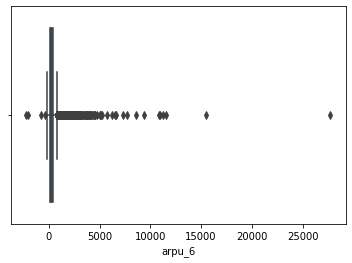

In [40]:
sns.boxplot(telecom_churn_df.arpu_6)


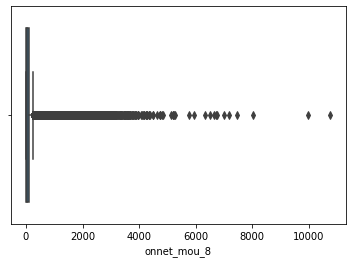

In [41]:
sns.boxplot(telecom_churn_df.onnet_mou_8)


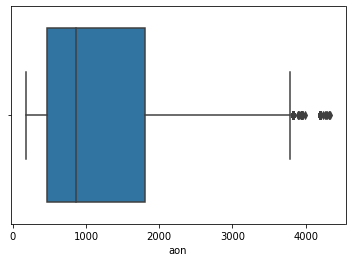

In [42]:
sns.boxplot(telecom_churn_df.aon)

## Step 7: Bivariate EDA

In [43]:
telecom_churn_filtered.shape

(30001, 174)

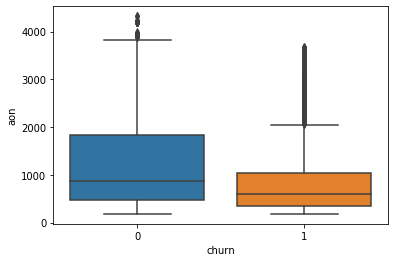

In [44]:
#bivariate(telecom_churn_filtered.churn, telecom_churn_filtered.aon)
sns.boxplot(telecom_churn_filtered.churn, telecom_churn_filtered.aon)

In [45]:
pd.crosstab(telecom_churn_filtered.churn, telecom_churn_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [46]:
# As per the above data, only 2 % of the night pack users on 8th month will be churned.

In [47]:
pd.crosstab(telecom_churn_filtered.churn, telecom_churn_filtered.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,...,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,...,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
telecom_churn_filtered.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,3.000100e+04,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,0.0,0.0,0.0,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,...,-0.013833,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637
std,6.908784e+05,0.0,0.0,0.0,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,...,0.174520,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555
min,7.000000e+09,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,...,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,7.000609e+09,0.0,0.0,0.0,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,...,0.000000,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000
50%,7.001203e+09,0.0,0.0,0.0,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001804e+09,0.0,0.0,0.0,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,...,0.000000,44.280000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,7.002411e+09,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,...,4.450000,3485.370000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


In [49]:
telecom_churn_filtered.drop('mobile_number',axis=1,inplace=True)

In [50]:
from pandas.api.types import is_numeric_dtype

In [51]:
telecom_churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 173 entries, loc_og_t2o_mou to vol_3g_mb_diff
dtypes: float64(147), int64(26)
memory usage: 41.1 MB


In [52]:
telecom_churn_filtered.describe(include='all')

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.0,0.0,0.0,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,...,-0.013833,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637
std,0.0,0.0,0.0,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,...,0.174520,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,...,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,0.0,0.0,0.0,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,71.610000,...,0.000000,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000
50%,0.0,0.0,0.0,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,...,0.000000,44.280000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,...,4.450000,3485.370000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


## Step 8: Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
telecom_churn_filtered['churn'] = pd.to_numeric(telecom_churn_filtered['churn'])

In [55]:
X = telecom_churn_filtered.drop("churn", axis = 1)
y = telecom_churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [56]:
# print shapes of train and test sets
X_train.shape

(22500, 172)

In [57]:
X_test.shape

(7501, 172)

In [58]:
y_train.shape

(22500,)

In [59]:
y_test.shape

(7501,)

In [60]:
## Modelling Part
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.9304092787628316
Sensitivity/Recall : 0.33114754098360655


In [62]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.9304092787628316
Sensitivity/Recall : 0.33114754098360655


In [63]:
logreg = LogisticRegression(penalty='l1', C = 0.1, class_weight = 'balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.8101586455139315
Sensitivity/Recall : 0.8426229508196721


In [64]:
logreg = LogisticRegression(penalty='l2', C = 0.01, class_weight = 'balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy : 0.8108252233035596
Sensitivity/Recall : 0.839344262295082


## Step 9: PCA

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA

In [67]:
pca = PCA(svd_solver='randomized', random_state=42)

In [68]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [69]:
pca.components_

array([[ 9.81226448e-17, -1.11022302e-16, -2.77555756e-17, ...,
         8.31304839e-03,  7.31509475e-03,  1.67965674e-02],
       [-1.94120031e-17, -5.55111512e-17, -1.11022302e-16, ...,
         2.97134433e-03,  4.13438706e-03,  2.33711465e-02],
       [-4.87811950e-18, -1.04083409e-17, -1.66533454e-16, ...,
         2.08396505e-02,  7.37185548e-03,  7.99034894e-02],
       ...,
       [ 0.00000000e+00,  3.14816381e-02, -2.52825776e-02, ...,
         3.62970696e-05,  7.60171603e-03,  1.11854453e-03],
       [-0.00000000e+00,  2.38914078e-02,  5.67083702e-02, ...,
        -2.25125495e-03,  3.50235537e-03,  9.89708997e-04],
       [-9.99999908e-01,  3.33777368e-05, -4.12600919e-05, ...,
        -2.29259565e-05, -1.52342435e-05, -1.32488806e-04]])

In [70]:
# apply pca to train data
from sklearn.preprocessing import StandardScaler
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [71]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [72]:
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.93
1       17.74
2       23.28
3       27.87
4       31.78
5       35.39
6       38.32
7       40.87
8       43.30
9       45.52
10      47.59
11      49.60
12      51.52
13      53.28
14      55.01
15      56.72
16      58.35
17      59.84
18      61.29
19      62.60
20      63.85
21      65.06
22      66.25
23      67.42
24      68.56
25      69.65
26      70.71
27      71.74
28      72.73
29      73.72
        ...  
142    100.00
143    100.00
144    100.00
145    100.00
146    100.00
147    100.00
148    100.00
149    100.00
150    100.00
151    100.00
152    100.00
153    100.00
154    100.00
155    100.00
156    100.00
157    100.00
158    100.00
159    100.00
160    100.00
161    100.00
162    100.00
163    100.00
164    100.00
165    100.00
166    100.00
167    100.00
168    100.00
169    100.00
170    100.00
171    100.00
Length: 172, dtype: float64


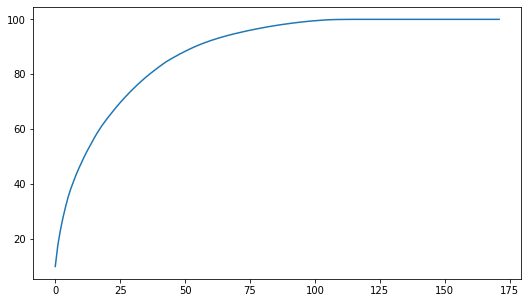

In [73]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## Step 10: PCA and Logistic Regression


In [74]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(penalty='l1', C = 0.01,class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [75]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8106666666666666

### Evaluate on test data

In [76]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

# predict churn on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5525 1366]
 [ 100  510]]
Sensitivity: 	0.84
Specificity: 	0.8
AUC:    	 0.89


### PCA and Logistic Regression Combined Tuning

In [77]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [78]:
# PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [79]:

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight={0: ...y='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [80]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.406370,0.970808,0.062797,0.007136,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.888725,0.893742,...,0.885645,0.007365,32,0.891091,0.889552,0.894147,0.892683,0.891198,0.891734,0.001561
1,4.702679,0.419138,0.090036,0.022402,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.891584,0.896236,...,0.888020,0.006812,13,0.893969,0.892153,0.898381,0.895622,0.894212,0.894867,0.002075
2,4.153200,0.233151,0.120815,0.035325,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.890308,0.894449,...,0.886065,0.006610,31,0.893339,0.891143,0.896296,0.894702,0.894111,0.893918,0.001694
3,5.445918,0.799904,0.083393,0.007867,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.892728,0.896564,...,0.887866,0.006419,15,0.897083,0.895063,0.900580,0.897453,0.897984,0.897633,0.001775
4,3.619229,0.560850,0.088228,0.014604,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.890551,0.894490,...,0.886339,0.006333,29,0.893561,0.891417,0.896648,0.895446,0.894429,0.894300,0.001772
5,4.552198,0.854418,0.094803,0.014973,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.893038,0.896949,...,0.888299,0.006581,1,0.897267,0.895162,0.900883,0.897990,0.898151,0.897891,0.001837
6,4.676291,0.482665,0.083401,0.022472,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.891035,0.894626,...,0.886592,0.006136,26,0.894130,0.891759,0.897158,0.895281,0.894677,0.894601,0.001750
7,4.847880,0.178653,0.111002,0.008603,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.893349,0.897178,...,0.888163,0.006643,8,0.897800,0.895673,0.901095,0.898136,0.899043,0.898349,0.001762
8,4.581418,1.150286,0.078124,0.007394,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.890731,0.895080,...,0.886761,0.006246,20,0.893938,0.891661,0.897400,0.895708,0.895072,0.894756,0.001910
9,5.018514,1.567478,0.084205,0.008911,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.893121,0.897369,...,0.888220,0.006520,6,0.897677,0.895545,0.901080,0.898123,0.900212,0.898527,0.001957


In [81]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8882990732436775
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 80}


In [82]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5820 1071]
 [ 116  494]]
Sensitivity: 	0.81
Specificity: 	0.84
AUC:    	 0.9


## Step 11: Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

C:\Users\psivasubrama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [84]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [85]:

# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6793   98]
 [ 337  273]]
Sensitivity: 	0.45
Specificity: 	0.99
AUC:    	 0.89


### Selecting best features

In [86]:

# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [87]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.0s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=4,
            verbose=1, warm_start=False)

In [88]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[6789  102]
 [ 314  296]]
Sensitivity: 	0.49
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Feature Importance

In [89]:
# predictors
features = telecom_churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.406585
1,loc_ic_mou_8,5.255120
2,loc_ic_t2m_mou_8,4.924727
3,total_og_mou_8,2.744423
4,loc_og_t2m_mou_8,2.682279
5,loc_og_mou_8,2.679480
6,last_day_rch_amt_8,2.493903
7,total_rech_amt_diff,2.476333
8,arpu_8,2.308695
9,loc_og_t2t_mou_8,1.961510


### Extracting top 30 features

In [90]:

# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

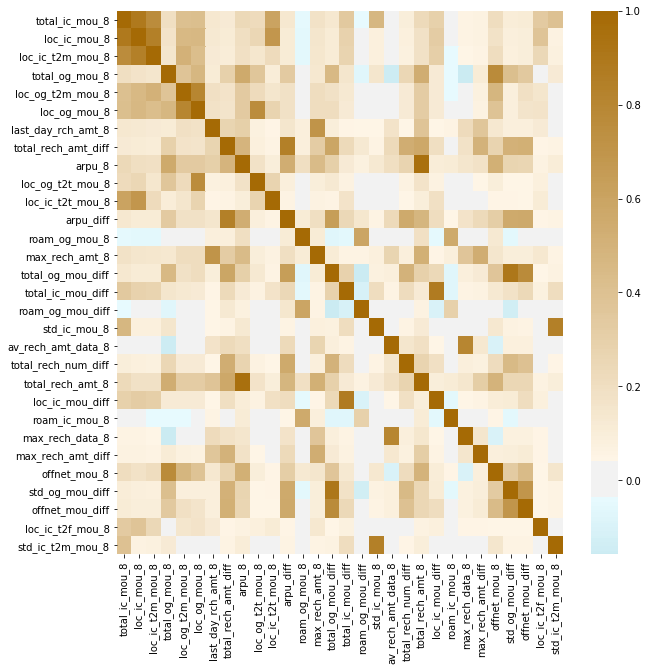

In [91]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(220, 45, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [92]:

top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [93]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [94]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [95]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8741916236092184
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [96]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5722 1169]
 [ 122  488]]
Sensitivity: 	0.8
Specificity: 	0.83
ROC:    	 0.88


## Step 12: Extract the intercept and the coefficients from the logistic model

In [97]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [98]:
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [99]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [100]:

# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.534054,-1.556931,-0.776262,-1.586756,0.247201,0.002567,0.189862,0.381219,-0.797625,1.039803


## Model Evaluation

### Logistic Regression:
* Accuracy : 0.81
* Sensitivity/Recall : 0.84

### PCA:
* Accuracy :  0.89
* Sensitivity: 	0.83
* Specificity: 	0.8

### Random Forest:
* Accuracy:   	 0.89
* Sensitivity: 	0.45
* Specificity: 	0.99

##  Summary and Recommendations

* Telecom company needs to give more discounts to the roaming rates. So that the customers who are using services from a roaming zone will remain in the same network.
* Telecom company should stop additional charges for STD rates. They can use the same local calls rates to STD rates as well to attract the customers. 
* Give additional data on data pack recharges for 8th Month. 
* Talk to the 8% churned customers to know his concern to swith over to the different network. 
* Based on the customer's last recharge/data, if the usuage is less then previous month, then talk to the customer to know his conerns.  